# 7. Bagging

The mai idea is that many weak learner are trained and then averaged together to get a strong final learner that provides accurate predictions.

Bagging is Bootstrap Aggregating:
* build a lot of different base learners on bootstrapped samples of the original dataset
* combine all the predictions made using (averaging) all the bootstrapped samples

Model averaging helps to:
* reduce variance
* avoid overfitting

Bagging works best for base learners with:
* low bias and high variance
* for example: deep decision trees

The combination of the predictions of the trees:
* AVERAGE prediction for a regression problem
* MAJORITY vote for a classification problem

In [1]:
# import libraries
import os
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [2]:
# generate synthetic data
x = np.linspace(start = 0, stop = 2 * np.pi, num=500)
m = 2 * np.sin(x)
y = m + np.random.normal(loc = 0, scale = 1, size = len(x))

In [3]:
# adding column name to array (and transforming it into pd.DataFrame)
df = pd.DataFrame({'y':y, 'm':m, 'feature_1':x}); df

,y,m,feature_1
0,0.705165,0.000000e+00,0.000000
1,1.743334,2.518244e-02,0.012592
2,0.124706,5.036089e-02,0.025183
3,-0.429444,7.553136e-02,0.037775
4,-0.162541,1.006898e-01,0.050366
...,...,...,...
495,-1.935215,-1.006898e-01,6.232819
496,-0.716004,-7.553136e-02,6.245411
497,-0.502976,-5.036089e-02,6.258002
498,2.184426,-2.518244e-02,6.270594


In [4]:
sample_1 = df.sample(df.shape[0], replace = True)
sample_2 = df.sample(df.shape[0], replace = True)
sample_3 = df.sample(df.shape[0], replace = True)

In [5]:
# fit a very deep tree
x_1 = np.array(sample_1['feature_1']).reshape(-1,1)
y_1 = np.array(sample_1['y']).reshape(-1,1)

tree_1 = tree.DecisionTreeRegressor(max_depth = 30,
                                      min_samples_split = 20,
                                      min_samples_leaf = 3,
                                      ccp_alpha = 0.01).fit(x_1, y_1)

tree_1_pred = tree_1.predict(x_1)

In [6]:
# we sort in order to use plt.plot instead of plt.scatter
idx = np.argsort(x_1.flatten())
y_1_sort = np.array(y_1)[idx]
x_1_sort = np.array(x_1)[idx]
sample_1_m_sort = np.array(sample_1.m)[idx]
tree_1_pred_sort = np.array(tree_1_pred)[idx]

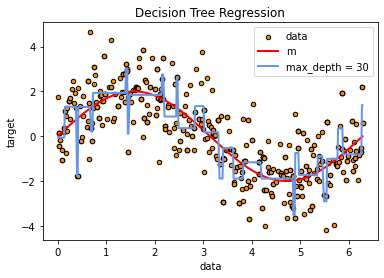

In [7]:
# Plot deep_tree
%matplotlib inline
plt.scatter(x_1_sort, y_1_sort, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.plot(x_1_sort, sample_1_m_sort, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.plot(x_1_sort, tree_1_pred_sort, color="cornflowerblue", label="max_depth = 30", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [8]:
# fit a very deep tree
x_2 = np.array(sample_2['feature_1']).reshape(-1,1)
y_2 = np.array(sample_2['y']).reshape(-1,1)

tree_2 = tree.DecisionTreeRegressor(max_depth = 30,
                                      min_samples_split = 20,
                                      min_samples_leaf = 3,
                                      ccp_alpha = 0.01).fit(x_2, y_2)
tree_2_pred = tree_2.predict(x_2)

In [9]:
# we sort in order to use plt.plot instead of plt.scatter
idx = np.argsort(x_2.flatten())
y_2_sort = np.array(y_2)[idx]
x_2_sort = np.array(x_2)[idx]
sample_2_m_sort = np.array(sample_2.m)[idx]
tree_2_pred_sort = np.array(tree_2_pred)[idx]

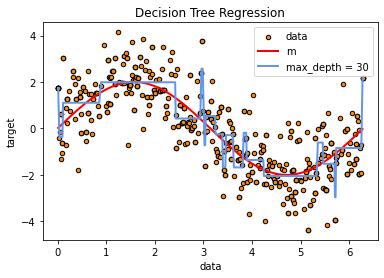

In [10]:
# Plot deep_tree
%matplotlib inline
plt.scatter(x_2_sort, y_2_sort, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.plot(x_2_sort, sample_2_m_sort, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.plot(x_2_sort, tree_2_pred_sort, color="cornflowerblue", label="max_depth = 30", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [11]:
# we compute the row mean of the two trees (we use the sorted results)
tot_pred = np.mean([tree_1_pred_sort,tree_2_pred_sort], axis = 0)

In [12]:
# we sort in order to use plt.plot instead of plt.scatter
idx = np.argsort(df.feature_1.values.flatten())
tot_pred_sort = np.array(tot_pred)[idx]

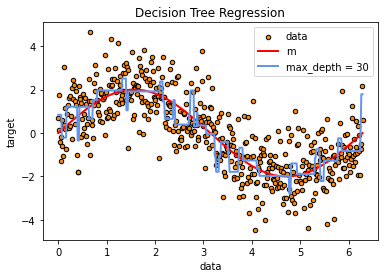

In [13]:
%matplotlib inline
plt.scatter(df.feature_1, df.y, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.plot(df.feature_1, df.m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.plot(df.feature_1, tot_pred_sort, color="cornflowerblue", label="max_depth = 30", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [14]:
# fit a very deep tree
x_3 = np.array(sample_3['feature_1']).reshape(-1,1)
y_3 = np.array(sample_3['y']).reshape(-1,1)

tree_3 = tree.DecisionTreeRegressor(max_depth = 30,
                                      min_samples_split = 20,
                                      min_samples_leaf = 3,
                                      ccp_alpha = 0.01).fit(x_3, y_3)

tree_3_pred = tree_3.predict(x_3)

In [15]:
# we sort in order to use plt.plot instead of plt.scatter
idx = np.argsort(x_3.flatten())
y_3_sort = np.array(y_3)[idx]
x_3_sort = np.array(x_3)[idx]
sample_3_m_sort = np.array(sample_3.m)[idx]
tree_3_pred_sort = np.array(tree_3_pred)[idx]

In [16]:
tot_pred = np.mean([tree_1_pred_sort,tree_2_pred_sort,tree_3_pred_sort], axis = 0)

In [17]:
# we sort in order to use plt.plot instead of plt.scatter
idx = np.argsort(df.feature_1.values.flatten())
tot_pred_sort = np.array(tot_pred)[idx]

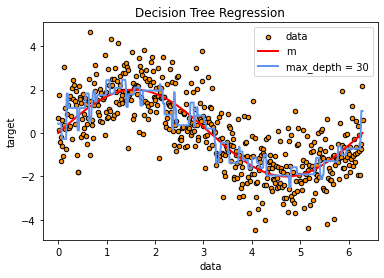

In [18]:
%matplotlib inline
plt.scatter(df.feature_1, df.y, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.plot(df.feature_1, df.m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.plot(df.feature_1, tot_pred_sort, color="cornflowerblue", label="max_depth = 30", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [19]:
from sklearn.ensemble import BaggingRegressor

In [20]:
# fit a very deep tree
x = np.array(df['feature_1']).reshape(-1,1)
y = np.array(df['y']).ravel()

In [30]:
bagging_regr = BaggingRegressor(base_estimator=tree.DecisionTreeRegressor(max_depth = 30,
                                      min_samples_split = 20,
                                      min_samples_leaf = 3,
                                      ccp_alpha = 0.01), n_estimators=200, random_state=0, oob_score = True).fit(x, y)

In [31]:
pred = bagging_regr.predict(x)

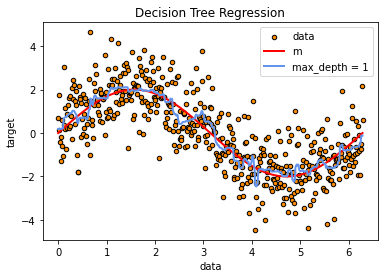

In [32]:
# Plot deep_tree
%matplotlib inline
plt.scatter(x, y, s=20, edgecolor="black", c="darkorange", label="data") # plot raw data (including stoch. desturbance)
plt.plot(x, m, color="red", label="m", linewidth=2) # plot raw data (excluding stoch. desturbance)
plt.plot(x, pred, color="cornflowerblue", label="max_depth = 1", linewidth=2) # depth 1
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Out-of-bag (OOB) score (probability to observe a sample in the bootstrapped dataset):

In [42]:
bagging_regr.oob_score_

0.6066819127481702

Let's connect the number of bootstrap aggregations and the OOB error:

In [59]:
# let's define a helper function
def bagging_module(x, y, dt_depth, min_samp_split, min_samp_leaf, ccp_alpha, n_bag):
    res_obj = BaggingRegressor(base_estimator = tree.DecisionTreeRegressor(max_depth = dt_depth,
                                      min_samples_split = min_samp_split,
                                      min_samples_leaf = min_samp_leaf,
                                      ccp_alpha = ccp_alpha), n_estimators = n_bag, random_state = 0 , oob_score = True).fit(x, y)
    return 1 - res_obj.oob_score_

In [63]:
# create steps for n_bag
bagging_step = np.linspace(2, 200, num = 50, dtype = int); bagging_step

array([  2,   6,  10,  14,  18,  22,  26,  30,  34,  38,  42,  46,  50,
        54,  58,  62,  66,  70,  74,  78,  82,  86,  90,  94,  98, 103,
       107, 111, 115, 119, 123, 127, 131, 135, 139, 143, 147, 151, 155,
       159, 163, 167, 171, 175, 179, 183, 187, 191, 195, 200])

In [64]:
res = [bagging_module(x, y, dt_depth = 30, min_samp_split = 20, min_samp_leaf = 3, ccp_alpha = 0.01, n_bag = i) for i in bagging_step]

C:\Users\u0149060\Anaconda3\envs\dev_env\lib\site-packages\sklearn\ensemble\_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\u0149060\Anaconda3\envs\dev_env\lib\site-packages\sklearn\ensemble\_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\u0149060\Anaconda3\envs\dev_env\lib\site-packages\sklearn\ensemble\_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  "Some inputs do not have OOB scores. "
C:\Users\u0149060\Anaconda3\envs\dev_env\lib\site-packages\sklearn\ensemble\_bagging.py:1164: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators we

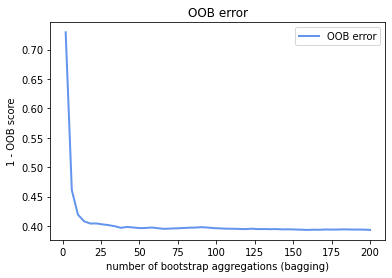

In [67]:
# Plot deep_tree
%matplotlib inline
plt.plot(bagging_step, res, color="cornflowerblue", label="OOB error", linewidth=2) # depth 1
plt.xlabel("number of bootstrap aggregations (bagging)")
plt.ylabel("1 - OOB score")
plt.title("OOB error")
plt.legend()
plt.show()